## Exercise 1 – Web API
Write a python program to do the following:
1. Get a one month of historical weather data (i.e. temperatures). In specific: one month of data for 5 distinct locations.
2. You can use any WEB service available for free (i.e. Open-Weather-Map, Google, or any other service you may like) make sure to get an API-KEY if required.
3. Build a data summary table that summaries max, min, and mean values of the temperature during that month for each location selected.
4. Plot a graph that shows your data for the selected locations (to be used as comparative tool, you can choose any graphical presentation as you like).

In [382]:
import urllib.request
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt


code = ['CYVR','KORD','CYKZ','MMUN','KAGC']
city = ['Vancouver','Chicago','Toronto','Cancun','Pittsburgh']
province = ['British Columbia','Illinois','Ontario','Mexico','Pennsylvania']
url = "https://www.wunderground.com/history/airport/%s/2016/12/1/MonthlyHistory.html?"


In [383]:


def make_url(code):
    
    url = "https://www.wunderground.com/history/airport/%s/2016/12/1/MonthlyHistory.html?"%(code)
    return url

def city_weather(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    type(html)
    html = str(html,'ISO-8859-1')
    #keyword = "href = "/history/airport/%s/%d/%d/%d/DailyHistory.html""
    patt = '<table cellspacing="0" cellpadding="0" id="obsTable".*?</table>'
    l = re.findall(patt,html,re.DOTALL)
    tbl = l[0]
    patt2 = '<tbody>.*?</tbody>'
    tbs = re.findall(patt2,tbl,re.DOTALL)
    len(tbs)
    #result = re.sub(b'<.*?>', "", tbs)
    month = re.findall('<td>(\w{3})</td>',tbs.pop(0))[0]
    month
    dayl = []
    for i in tbs:
        patt3 ='>(-*\d+)<'
        patt4 = '\\n(\w{1,6})\\n'
        dayl.append(re.findall(patt3,i, re.DOTALL)+(re.findall(patt4,i,re.DOTALL)))
                    
    daypd = pd.DataFrame(dayl)
    #col = ['index','date','Temphigh','TempAvg','TempLow', 'Dew','Dew','Dew','Humidity','Humidity','Humidity','Visibility',\
    #       'Visibility','Visibility','Wind','Wind','Wind','Events','Events','Events']
    #daypd.columns = col
    return daypd[2]

In [384]:

dic = {}


In [385]:
for i in list(range(5)):
    dic[city[i]] = city_weather(make_url(code[i]))

In [386]:
import numpy as np
dic.keys()
dic = pd.DataFrame(dic).astype(float)
dic.describe().loc[['max','min','mean']]

,Cancun,Chicago,Pittsburgh,Toronto,Vancouver
max,83.000000,41.000000,50.000000,40.000000,44.000000
min,73.000000,1.000000,12.000000,11.000000,22.000000
mean,77.548387,25.290323,32.709677,27.258065,32.903226


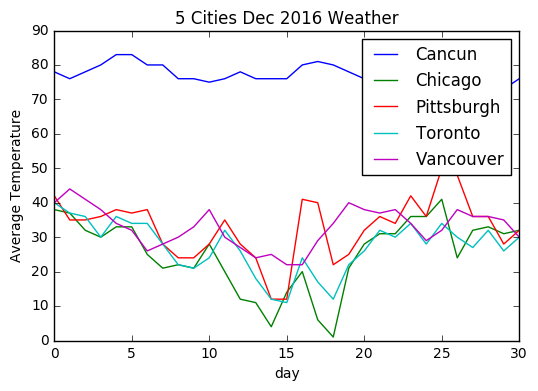

In [387]:
for k,v in dic.items():
    plt.plot(v)


plt.legend(dic.keys())
plt.xlabel("day")

plt.ylabel("Average Temperature")
plt.title('5 Cities Dec 2016 Weather')
plt.show()

## Exercise 2 – Web Scraping
Rewrite the scarping sample done in the class – jail house inmates – not to use RegEx, instead use BeautifulSoap library.
Extra points: Can you scrape all pages not the first page only … (WEB CRWALER). Currently the site has 5 pages assuming “Page Size = 50”

In [389]:
from bs4 import BeautifulSoup


In [390]:
url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
response = requests.get(url)
html = response.content.decode('ascii')
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')
cols = []
for tr in soup.find_all('tr')[15:]:
    rows = tr.findAll('td')
    content = [data.get_text() for data in rows[1:]]
    if content:
        cols.append(content)


In [391]:
cols

[['ALEXANDER', 'BENJAMIN', 'FRANKLIN', 'M', 'B', '22', 'COLUMBIA', 'MO'],
 ['ANDERSON', 'ANDRE', 'LAMONTE', 'M', 'B', '30', 'ST. LOUIS', 'MO'],
 ['ARTEAGA', 'BRAYAN', 'OSIRIS-CACHO', 'M', 'H', '25', 'JEFFERSON CITY', 'MO'],
 ['AUBREY', 'ASHLEY', 'SUZANNE', 'F', 'B', '20', 'PILOT GROVE', 'MO'],
 ['AUSTIN', 'KAY', 'CEE', 'F', 'W', '33', 'KANSAS CITY', 'MO'],
 ['BARNHOUSE', 'CHANCE', 'ANTHONY', 'M', 'W', '22', 'COLUMBIA', 'MO'],
 ['BENNETT', 'VONTHILLA', 'MARIE', 'F', 'B', '52', 'COLUMBIA', 'MO'],
 ['BLAND', 'RANDY', 'LAMONT', 'M', 'B', '22', 'SPRINGFIELD', 'MO'],
 ['BLANFORD', 'KENNETH', 'JAVAR', 'M', 'B', '32', 'COLUMBIA', 'MO'],
 ['BOATRIGHT', 'SCOTT', 'RICHARD', 'M', 'W', '30', 'ST LOUIS', 'MO'],
 ['BODINE', 'EDITH', 'JOYCE', 'F', 'W', '41', 'MOBERLY', 'MO'],
 ['BOGART', 'COURTNEY', 'LEE', 'M', 'W', '39', 'COLUMBIA', 'MO'],
 ['BONAPARTE', 'NATHANIEL', 'LEROY', 'M', 'B', '38', 'COLUMBIA', 'MO'],
 ['BROOKINS', 'OSCAR', 'MENTER', 'M', 'B', '28', 'COLUMBIA', 'MO'],
 ['BROOKINS', 'QUANTREL